In [5]:
import os
import subprocess
import sys
sys.path.append('..')
from tools.qc.scanpy_qc import scanpy_qc
from tools.qc.dropkick_qc import dropkick_qc
from tools.formating.formating import *
# from tools.run_qc import run_qc

In [6]:
dataset='hg19'
input_path='/ps/ai-ready/data/filtered_gene_bc_matrices/hg19/'
# methods=None
methods='Scanpy'
path_of_scrublet_calls=os.path.abspath('../tools/qc/scrublet_calls.tsv')
print(path_of_scrublet_calls)

/ps/ai-ready/backend/api/tools/qc/scrublet_calls.tsv


In [ ]:
# run_qc(dataset, input, output, methods, path_of_scrublet_calls='./scrublet_calls.tsv', show_error=True)

## Scanpy

In [7]:
adata = load_anndata(input_path)
adata

... reading from cache file cache/ps-ai-ready-data-filtered_gene_bc_matrices-hg19-matrix.h5ad


AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [8]:
import numpy as np
import pandas as pd
import scanpy as sc
import scrublet as scr

In [ ]:
output = get_output_path(dataset, input_path, method='scanpy', format = "AnnData")

filtered out 18972 genes that are detected in less than 3 counts
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


/usr/local/lib/python3.8/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:05)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:04)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 14 clusters and added
    'cluster2', the cluster labels (adata.obs, 

/usr/local/lib/python3.8/dist-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


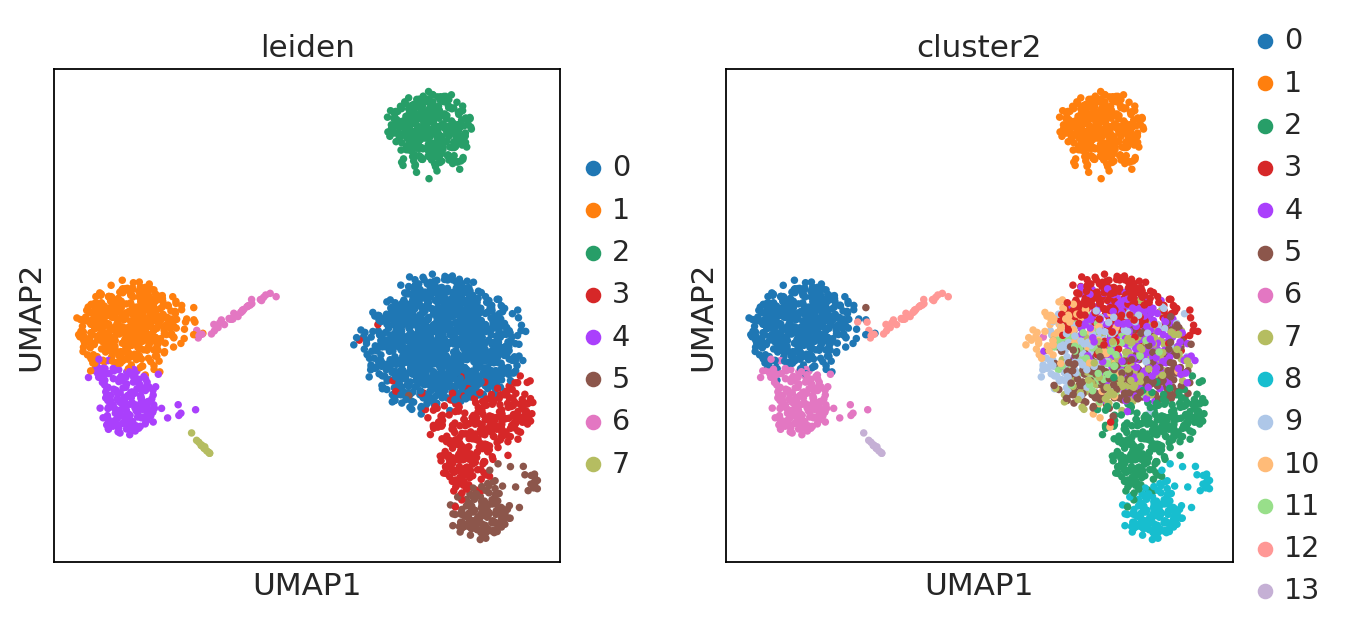

NameError: name 'output' is not defined

In [9]:
adata = scanpy_qc(adata)
 # Save AnnData object
adata.write_h5ad(output, compression='gzip')
print("AnnData object for Scanpy QC is saved successfully")

In [10]:
adata.var_names_make_unique()
adata

AnnData object with n_obs × n_vars = 2638 × 1829
    obs: 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'cluster2'
    var: 'gene_ids', 'n_counts', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cluster2_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [11]:
scrub = scr.Scrublet(adata.X, expected_doublet_rate = 0.076)
adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets(min_counts=2, min_cells=3, 
                                                          min_gene_variability_pctl=85, n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.23
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 7.6%
	Estimated  = 100.0%
Elapsed time: 1.7 seconds


(<Figure size 640x240 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

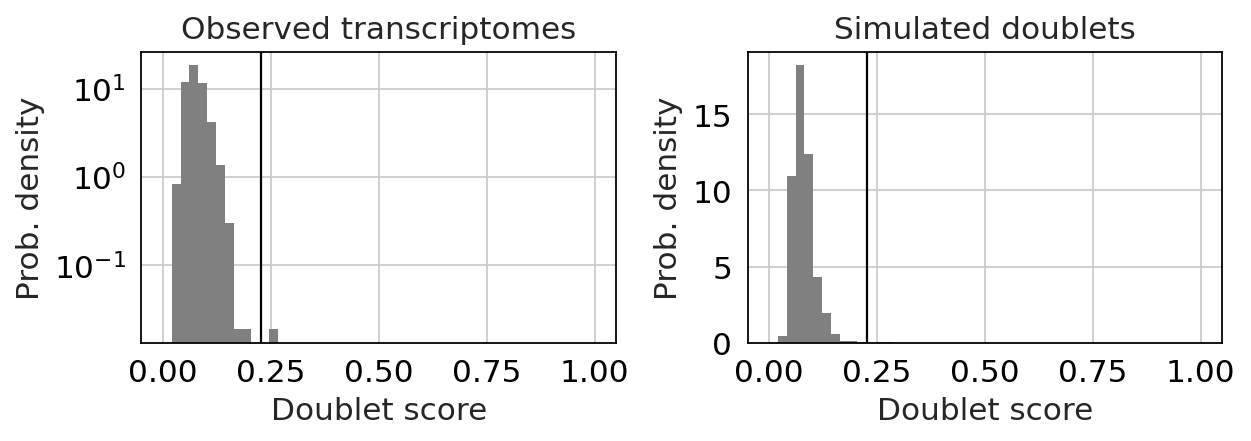

In [12]:
scrub.plot_histogram()

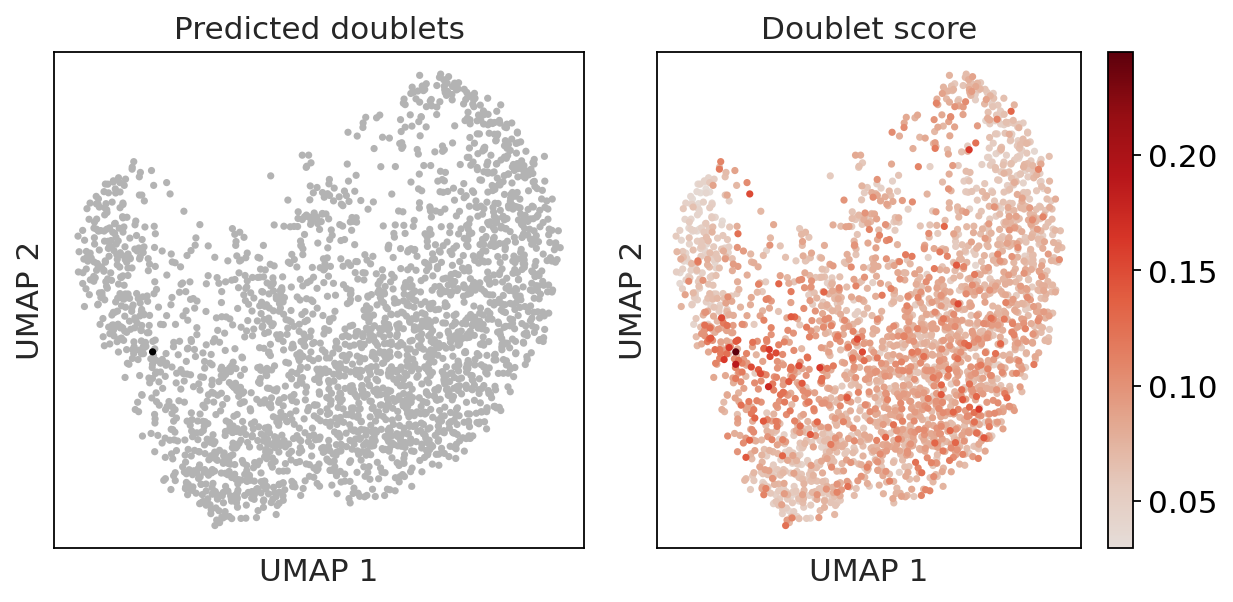

In [13]:
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))
scrub.plot_embedding('UMAP', order_points=True);

In [14]:
adata.obs

,n_counts,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,cluster2,doublet_scores,predicted_doublets
AAACATACAACCAC-1,2421.0,779,2419.0,73.0,3.017776,0,4,0.070957,False
AAACATTGAGCTAC-1,4903.0,1352,4903.0,186.0,3.793596,2,1,0.074698,False
AAACATTGATCAGC-1,3149.0,1129,3147.0,28.0,0.889736,0,9,0.087558,False
AAACCGTGCTTCCG-1,2639.0,960,2639.0,46.0,1.743085,4,6,0.052708,False
AAACCGTGTATGCG-1,981.0,521,980.0,12.0,1.224490,5,8,0.067446,False
...,...,...,...,...,...,...,...,...,...
TTTCGAACTCTCAT-1,3461.0,1153,3459.0,73.0,2.110436,1,0,0.074698,False
TTTCTACTGAGGCA-1,3447.0,1225,3445.0,32.0,0.928882,2,1,0.052708,False
TTTCTACTTCCTCG-1,1684.0,622,1684.0,37.0,2.197150,2,1,0.067446,False
TTTGCATGAGAGGC-1,1024.0,452,1022.0,21.0,2.054795,2,1,0.064146,False


In [15]:
adata.obs['predicted_doublets'].value_counts()

False    2637
True        1
Name: predicted_doublets, dtype: int64

In [19]:
scrublet_path = os.path.join(os.path.dirname(input_path), "scrublet_calls.tsv")
scrublet_path

'/ps/ai-ready/data/filtered_gene_bc_matrices/hg19/scrublet_calls.tsv'

In [22]:
df_predicted_doublets = adata.obs.iloc[:, -2:]
df_predicted_doublets 

,doublet_scores,predicted_doublets
AAACATACAACCAC-1,0.070957,False
AAACATTGAGCTAC-1,0.074698,False
AAACATTGATCAGC-1,0.087558,False
AAACCGTGCTTCCG-1,0.052708,False
AAACCGTGTATGCG-1,0.067446,False
...,...,...
TTTCGAACTCTCAT-1,0.074698,False
TTTCTACTGAGGCA-1,0.052708,False
TTTCTACTTCCTCG-1,0.067446,False
TTTGCATGAGAGGC-1,0.064146,False


In [ ]:
df_

In [20]:
pd.DataFrame(adata.obs.iloc[:, -2:]).to_csv(scrublet_path,sep = '\t',header = False)

## Dropkick

In [ ]:
adata = load_anndata(input_path)
adata

In [ ]:
adata = dropkick_qc(adata)
output_path = get_output_path(dataset, input_path, method='dropkick')
# Save AnnData object
adata.write_h5ad(output_path, compression='gzip')
print("AnnData object for Dropkick QC is saved successfully")

## BIOCONDUCTOR

In [ ]:
output_path = get_output_path(dataset, input_path, method='Bioconductor', format='SingleCellExperiment')

In [ ]:
report_path = get_report_path(dataset, output_path, "Bioconductor")
print(report_path)

In [ ]:
bioconductor_path = os.path.abspath("../tools/qc/bioconductor_qc.Rmd")
print(bioconductor_path)

In [ ]:
s = subprocess.call(["R -e \"rmarkdown::render('" + bioconductor_path + "', params=list(dataset='" + str(dataset) + "', input_path='" + input_path + "', output='" + output_path + "', idtype='SYMBOL', colour_by=NULL, shape_by_1='NULL', shape_by_2='NULL',output_format='SingleCellExperiment'), output_file='" + report_path + "')\""], shell = True)
print(s)

## SEURAT

In [3]:
output_path = get_output_path(dataset, input_path, method='Seurat', format='Seurat')
report_path = get_report_path(dataset, output_path, "Seurat")
print(report_path)

/ps/ai-ready/data/filtered_gene_bc_matrices/results/hg19_Seurat.h5Seurat
/ps/ai-ready/data/filtered_gene_bc_matrices/results/hg19_Seurat_Seurat_report.html


In [4]:
seurat_path = os.path.abspath("../tools/qc/seurat_qc.Rmd")
s = subprocess.call(["R -e \"rmarkdown::render('" + seurat_path + "', params=list(dataset='" + str(dataset) + "', input='" + input_path + "', output='" + output_path + "', output_format='Seurat', path_of_scrublet_calls='" + path_of_scrublet_calls + "'), output_file='" + report_path + "')\""], shell = True)
print(s)


R version 4.2.1 (2022-06-23) -- "Funny-Looking Kid"
Copyright (C) 2022 The R Foundation for Statistical Computing
Platform: x86_64-pc-linux-gnu (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

  Natural language support but running in an English locale

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.

> rmarkdown::render('/ps/ai-ready/backend/api/tools/qc/seurat_qc.Rmd', params=list(dataset='hg19', input='/ps/ai-ready/data/filtered_gene_bc_matrices/hg19/', output='/ps/ai-ready/data/filtered_gene_bc_matrices/results/hg19_Seurat.h5Seurat', output_format='Seurat', path_of_scrublet_calls='/ps/ai-ready/backe



processing file: seurat_qc.Rmd


                                                                                                                         
1


Quitting from lines 79-89 (seurat_qc.Rmd) 
Error: No cells found
Execution halted
